<h1><center>Proyecto Final Autómatas y Lenguajes Formales</center></h1>
<h1><center>Solución de sudoku 2x2 empleando técnicas de autómatas</center></h1>
<h3>Elaborado por:</h3>
<h4>&emsp;&emsp;Gabriel Antonio Chavarro Avellaneda - 2152675</h4>
<h4>&emsp;&emsp;Oscar Julian Rondon Rendon - 2211854</h4>
<h4>&emsp;&emsp;Andrea Juliana Portilla Barrera - 2211852</h4>
<br>
<h3>Presentado a:</h3>
<h4>&emsp;&emsp;Luis Carlos Guayacán Chaparro</h4>

In [1]:
!mkdir files
!pip install automata-lib==7.1.0
from automata.fa.dfa import DFA
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 689.3 kB/s eta 0:00:00


In [ ]:
from IPython.display import Image, display

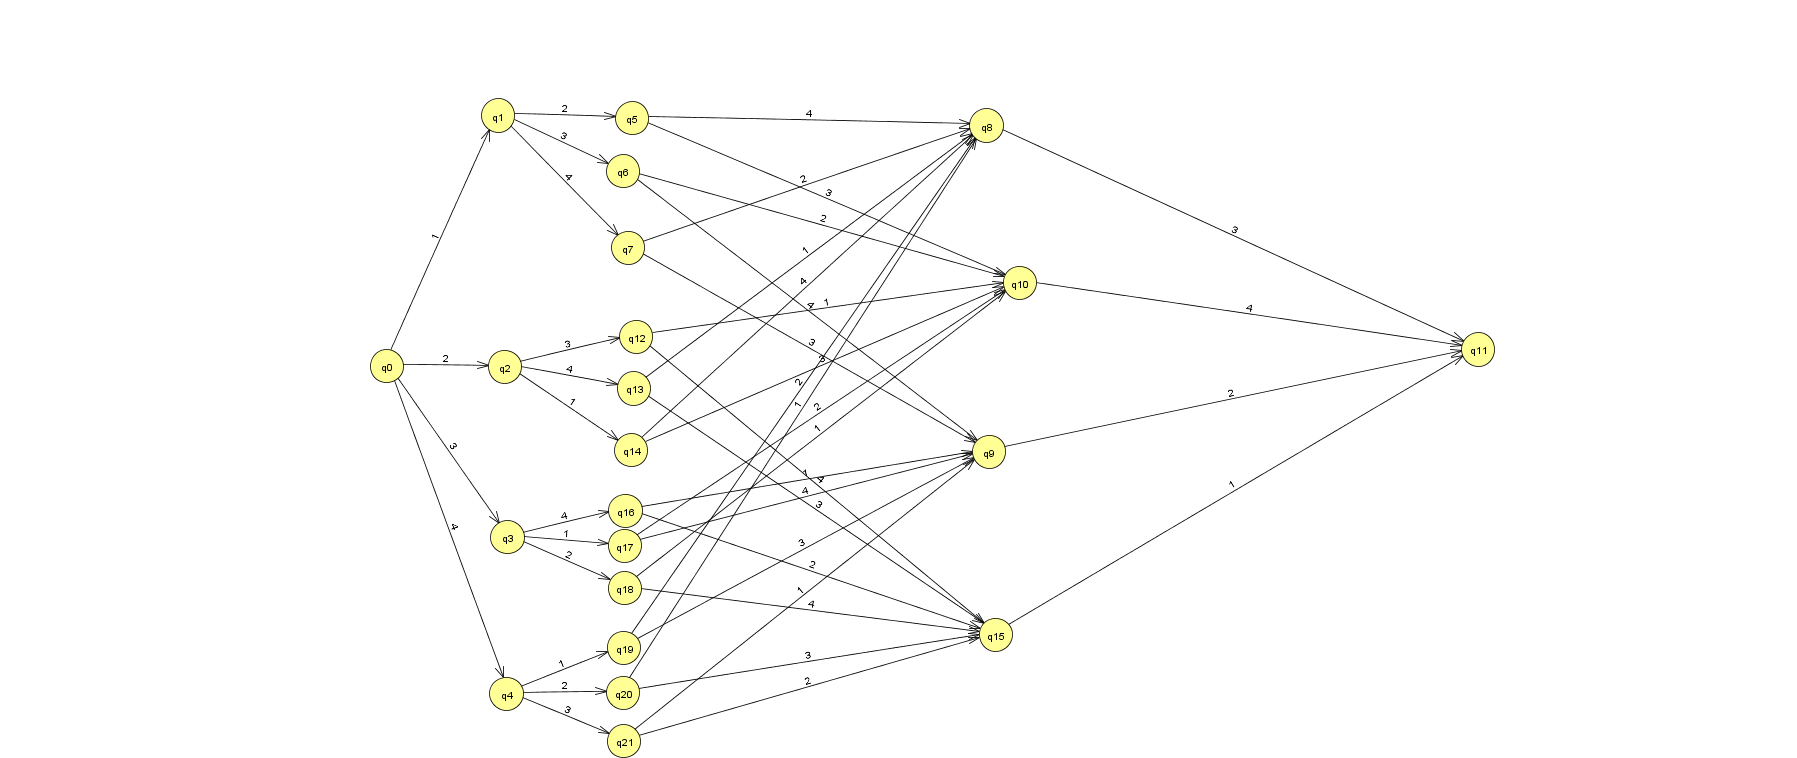

In [ ]:
display(Image('files/sudoku_2_2.png'))
######NO EJECUTAR ESTA LINEA GRUPO, QUE DAÑAN LA IMAGEN######
######NO EJECUTAR ESTA LINEA GRUPO, QUE DAÑAN LA IMAGEN######
######NO EJECUTAR ESTA LINEA GRUPO, QUE DAÑAN LA IMAGEN######
######NO EJECUTAR ESTA LINEA GRUPO, QUE DAÑAN LA IMAGEN######

<h3><center>Figura 1. Diagrama de estados automata validador de sudokus 4x4</center></h3>


DEFINICIÓN FORMAL

Q =$\lbrace q_0, q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8, q_9, q_{10}, q_{11}, q_{12}, q_{13}, q_{14}, q_{15}, q_{16}, q_{17}, q_{18}, q_{19}, q_{20}, q_{21}  \rbrace$

Σ = {1, 2, 3, 4}

Estado inicial = q0

Estado final = $\lbrace q_{11} \rbrace $

L = {1234, 1243, 1324, 1342, 1423,1432, 2134, 2143, 2314, 2341, 2413, 2431, 3124, 3142, 3214, 3241, 3412, 3421, 4123, 4132, 4213, 4231, 4312, 4321}


In [2]:
def revision(input_string):
    from automata.fa.dfa import DFA
    d = DFA(
        states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21'},
        input_symbols={'1', '2', '3', '4'},
        transitions={
            'q0': {'1': 'q1',
                   '2': 'q2',
                   '3': 'q3',
                   '4': 'q4'},
            'q1': {'2': 'q5',
                   '3': 'q6',
                   '4': 'q7'},
            'q2': {'3': 'q12',
                   '4': 'q13',
                   '1': 'q14'},
            'q3': {'4': 'q16',
                   '1': 'q17',
                   '2': 'q18'},
            'q4': {'1': 'q19',
                   '2': 'q20',
                   '3': 'q21'},
            'q5': {'4': 'q8',
                   '3': 'q10'},
            'q6': {'2': 'q10',
                   '4': 'q9'},
            'q7': {'2': 'q8',
                   '3': 'q9'},
            'q12': {'1': 'q10',
                    '4': 'q15'},
            'q13': {'1': 'q8',
                    '3': 'q15'},
            'q14': {'4': 'q8',
                    '3': 'q10'},
            'q16': {'1': 'q9',
                    '2': 'q15'},
            'q17': {'2': 'q10',
                    '4': 'q9'},
            'q18': {'1': 'q10',
                    '4': 'q15'},
            'q19': {'2': 'q8',
                    '3': 'q9'},
            'q20': {'1': 'q8',
                    '3': 'q15'},
            'q21': {'1': 'q9',
                    '2': 'q15'},
            'q8': {'3': 'q11'},
            'q10': {'4': 'q11'},
            'q9': {'2': 'q11'},
            'q15': {'1': 'q11'},
            'q11': {},
        },
        initial_state='q0',
        final_states={'q11'},
        allow_partial = True
    )

    current_state = d.initial_state
    for symbol in input_string:
        if symbol not in d.input_symbols:
            return False
        current_state = d.transitions[current_state].get(symbol)
        if current_state is None:
            return False

    return current_state in d.final_states

In [3]:
#Se crea la matriz vacia para asignarle valores al sudoku
sudoku = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

# Leer los valores para el Sudoku
print("Ingresa los valores para el Sudoku:")
for i in range(4):  # Recorre las filas
    for j in range(4):  # Recorre las columnas
        while True:
            valor = int(input("Ingresa el valor para la posición [{}, {}]: ".format(i, j)))
            if valor >= 0 and valor <= 4:
                sudoku[i][j] = valor
                break
            else:
                print("El valor ingresado debe estar entre 0 y 4.")

Ingresa los valores para el Sudoku:
Ingresa el valor para la posición [0, 0]: 1
Ingresa el valor para la posición [0, 1]: 2
Ingresa el valor para la posición [0, 2]: 3
Ingresa el valor para la posición [0, 3]: 4
Ingresa el valor para la posición [1, 0]: 4
Ingresa el valor para la posición [1, 1]: 3
Ingresa el valor para la posición [1, 2]: 2
Ingresa el valor para la posición [1, 3]: 1
Ingresa el valor para la posición [2, 0]: 3
Ingresa el valor para la posición [2, 1]: 1
Ingresa el valor para la posición [2, 2]: 4
Ingresa el valor para la posición [2, 3]: 2
Ingresa el valor para la posición [3, 0]: 2
Ingresa el valor para la posición [3, 1]: 4
Ingresa el valor para la posición [3, 2]: 1
Ingresa el valor para la posición [3, 3]: 3


In [4]:
#lista que guarda las palabras de las filas y columnas
horizontales = []
verticales = []

#dos for anidados para recorrer el sudoku
for i in range(4):
    palabrah = ""
    palabrav = ""

    for j in range(4):
        palabrah += str(int(sudoku[i][j]))
        palabrav += str(int(sudoku[j][i]))

    horizontales.append(palabrah)
    verticales.append(palabrav)

print(horizontales)
print(verticales)

#lista que guarda las palabras de cada cuadrante
cuadrantes = []
for i in range(0, 4, 2):  # Recorre las filas del sudoku de 2 en 2
        for j in range(0, 4, 2):  # Recorre las columnas del sudoku de 2 en 2
            cuadrante = ""
            for k in range(2):  # Recorre las filas del cuadrante
                for l in range(2):  # Recorre las columnas del cuadrante
                    cuadrante += str(int(sudoku[i+k][j+l]))
            cuadrantes.append(cuadrante)


print(cuadrantes)

['1234', '4321', '3142', '2413']
['1432', '2314', '3241', '4123']
['1243', '3421', '3124', '4213']


In [5]:
#VALIDACION DEL SUDOKU#

from pickle import FALSE
#lista de booleanos que verifica que todas la palabras que pasen por el automata sean correctas
cadenas = []
bool(cadenas)

for i in range (4):
  input_string = horizontales[i]
  is_valid = revision(input_string)
  cadenas.append(is_valid)

for i in range (4):
  input_string = verticales[i]
  is_valid = revision(input_string)
  cadenas.append(is_valid)

for i in range (4):
  input_string = cuadrantes[i]
  is_valid = revision(input_string)
  cadenas.append(is_valid)

checkpoint = False
for i in range(12):
  if cadenas[i] == True:
    checkpoint = True
  else :
    checkpoint = False
    break
if checkpoint == True:
  print("Muy bien, el sudoku está bien hecho")
else:
  print("Que mal, revisa tu sudoku de nuevo")

Muy bien, el sudoku está bien hecho


In [9]:
for i in sudoku:
  print(i)

[1, 2, 3, 4]
[4, 3, 2, 1]
[3, 1, 4, 2]
[2, 4, 1, 3]
